### Model Training 

#### Import libraries

In [16]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

import warnings 
warnings.filterwarnings('ignore')

#### Import dataset

In [55]:
df = pd.read_csv('data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Train data and test data

In [56]:
X = df.drop(columns=['math_score'], axis=1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [57]:
y=df['math_score']
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

#### Split data in train and test

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(800, 7)
(200, 7)
(800,)
(200,)


#### Data transformation

In [59]:
# numerical variables list
num_variables = X_train.select_dtypes(exclude='object').columns

# categorical variables list
cat_variables = X_train.select_dtypes(include='object').columns

# instantiating the scaler and OHE 
num_transformer = StandardScaler()
ohe_transformer = OneHotEncoder()

# applying the columns transformations
preprocessor = ColumnTransformer(
[
    ('OneHotEncoder', ohe_transformer, cat_variables),
    ('StandardScaler', num_transformer, num_variables)
]
)

In [60]:
X_train = preprocessor.fit_transform(X_train)
X_train.shape

(800, 19)

In [61]:
X_test = preprocessor.transform(X_test)
X_test.shape

(200, 19)

#### Metrics evaluation function

In [62]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r_squar = r2_score(true, predicted)
    return mae, rmse, r_squar

In [63]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor" : KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoost Regressor":CatBoostRegressor(),
    "AdaBoost Regressor":AdaBoostRegressor()
}

model_list = []

r2_list = []

for i in range(len(list(models))):
    model  = list(models.values())[i]
    model.fit(X_train, y_train)
    
    # make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # evaluate train and test dataset
    model_train_mae, model_train_rmse, model_train_r2=evaluate_model(y_train,y_train_pred)
    model_test_mae, model_test_rmse, model_test_r2=evaluate_model(y_test, y_test_pred)
    
    # printing model performance
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3259
- Mean Absolute Error: 4.2681
- R2 Score: 0.8742
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3863
- Mean Absolute Error: 4.2043
- R2 Score: 0.8808


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5925
- Mean Absolute Error: 5.2053
- R2 Score: 0.8072
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5173
- Mean Absolute Error: 5.1557
- R2 Score: 0.8254


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 4.2650
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 4.2111
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7064
- Mean Absolute Error: 4.5085
- R2 Score: 0.8556
-----------------------

139:	learn: 5.0567591	total: 230ms	remaining: 1.41s
140:	learn: 5.0502540	total: 232ms	remaining: 1.41s
141:	learn: 5.0483765	total: 233ms	remaining: 1.41s
142:	learn: 5.0426038	total: 238ms	remaining: 1.43s
143:	learn: 5.0374773	total: 240ms	remaining: 1.43s
144:	learn: 5.0323049	total: 242ms	remaining: 1.43s
145:	learn: 5.0259762	total: 244ms	remaining: 1.42s
146:	learn: 5.0195245	total: 246ms	remaining: 1.43s
147:	learn: 5.0175694	total: 249ms	remaining: 1.43s
148:	learn: 5.0089624	total: 252ms	remaining: 1.44s
149:	learn: 5.0038803	total: 254ms	remaining: 1.44s
150:	learn: 4.9963876	total: 256ms	remaining: 1.44s
151:	learn: 4.9933617	total: 257ms	remaining: 1.43s
152:	learn: 4.9900575	total: 258ms	remaining: 1.43s
153:	learn: 4.9869088	total: 259ms	remaining: 1.42s
154:	learn: 4.9852072	total: 260ms	remaining: 1.42s
155:	learn: 4.9790035	total: 261ms	remaining: 1.41s
156:	learn: 4.9731422	total: 262ms	remaining: 1.41s
157:	learn: 4.9670567	total: 263ms	remaining: 1.4s
158:	learn: 4

299:	learn: 4.4400368	total: 417ms	remaining: 974ms
300:	learn: 4.4350171	total: 419ms	remaining: 973ms
301:	learn: 4.4299621	total: 420ms	remaining: 971ms
302:	learn: 4.4276663	total: 422ms	remaining: 970ms
303:	learn: 4.4250300	total: 423ms	remaining: 968ms
304:	learn: 4.4225888	total: 424ms	remaining: 966ms
305:	learn: 4.4189367	total: 425ms	remaining: 964ms
306:	learn: 4.4168880	total: 426ms	remaining: 962ms
307:	learn: 4.4137734	total: 428ms	remaining: 961ms
308:	learn: 4.4111294	total: 429ms	remaining: 959ms
309:	learn: 4.4085082	total: 430ms	remaining: 958ms
310:	learn: 4.4048803	total: 432ms	remaining: 956ms
311:	learn: 4.4045938	total: 433ms	remaining: 954ms
312:	learn: 4.4021399	total: 434ms	remaining: 952ms
313:	learn: 4.4002847	total: 436ms	remaining: 953ms
314:	learn: 4.3958055	total: 437ms	remaining: 951ms
315:	learn: 4.3928388	total: 439ms	remaining: 950ms
316:	learn: 4.3892131	total: 441ms	remaining: 949ms
317:	learn: 4.3861981	total: 449ms	remaining: 963ms
318:	learn: 

475:	learn: 3.9855967	total: 610ms	remaining: 672ms
476:	learn: 3.9838535	total: 612ms	remaining: 671ms
477:	learn: 3.9832639	total: 614ms	remaining: 670ms
478:	learn: 3.9800672	total: 615ms	remaining: 669ms
479:	learn: 3.9781154	total: 616ms	remaining: 667ms
480:	learn: 3.9726616	total: 617ms	remaining: 666ms
481:	learn: 3.9699383	total: 618ms	remaining: 664ms
482:	learn: 3.9682114	total: 619ms	remaining: 663ms
483:	learn: 3.9661134	total: 621ms	remaining: 662ms
484:	learn: 3.9622460	total: 622ms	remaining: 661ms
485:	learn: 3.9613197	total: 624ms	remaining: 660ms
486:	learn: 3.9607819	total: 626ms	remaining: 659ms
487:	learn: 3.9589136	total: 628ms	remaining: 659ms
488:	learn: 3.9574283	total: 629ms	remaining: 657ms
489:	learn: 3.9526420	total: 630ms	remaining: 656ms
490:	learn: 3.9514868	total: 631ms	remaining: 654ms
491:	learn: 3.9493834	total: 632ms	remaining: 652ms
492:	learn: 3.9472979	total: 633ms	remaining: 651ms
493:	learn: 3.9462849	total: 634ms	remaining: 649ms
494:	learn: 

655:	learn: 3.6191257	total: 800ms	remaining: 419ms
656:	learn: 3.6188788	total: 803ms	remaining: 419ms
657:	learn: 3.6162074	total: 804ms	remaining: 418ms
658:	learn: 3.6120649	total: 805ms	remaining: 417ms
659:	learn: 3.6119559	total: 806ms	remaining: 415ms
660:	learn: 3.6107137	total: 807ms	remaining: 414ms
661:	learn: 3.6100440	total: 808ms	remaining: 413ms
662:	learn: 3.6073427	total: 809ms	remaining: 411ms
663:	learn: 3.6025106	total: 810ms	remaining: 410ms
664:	learn: 3.6004924	total: 811ms	remaining: 409ms
665:	learn: 3.5971711	total: 812ms	remaining: 407ms
666:	learn: 3.5943588	total: 813ms	remaining: 406ms
667:	learn: 3.5939453	total: 814ms	remaining: 405ms
668:	learn: 3.5936077	total: 815ms	remaining: 403ms
669:	learn: 3.5922387	total: 817ms	remaining: 402ms
670:	learn: 3.5901447	total: 818ms	remaining: 401ms
671:	learn: 3.5871515	total: 819ms	remaining: 400ms
672:	learn: 3.5860709	total: 821ms	remaining: 399ms
673:	learn: 3.5851027	total: 823ms	remaining: 398ms
674:	learn: 

843:	learn: 3.2749963	total: 996ms	remaining: 184ms
844:	learn: 3.2735700	total: 997ms	remaining: 183ms
845:	learn: 3.2696656	total: 998ms	remaining: 182ms
846:	learn: 3.2679847	total: 1000ms	remaining: 181ms
847:	learn: 3.2677025	total: 1s	remaining: 179ms
848:	learn: 3.2666719	total: 1s	remaining: 178ms
849:	learn: 3.2653598	total: 1s	remaining: 177ms
850:	learn: 3.2618983	total: 1s	remaining: 176ms
851:	learn: 3.2604563	total: 1s	remaining: 175ms
852:	learn: 3.2583891	total: 1.01s	remaining: 174ms
853:	learn: 3.2581085	total: 1.01s	remaining: 172ms
854:	learn: 3.2564249	total: 1.01s	remaining: 171ms
855:	learn: 3.2548180	total: 1.01s	remaining: 170ms
856:	learn: 3.2538984	total: 1.01s	remaining: 169ms
857:	learn: 3.2530237	total: 1.01s	remaining: 168ms
858:	learn: 3.2528455	total: 1.01s	remaining: 167ms
859:	learn: 3.2523160	total: 1.01s	remaining: 165ms
860:	learn: 3.2497530	total: 1.02s	remaining: 164ms
861:	learn: 3.2491511	total: 1.02s	remaining: 163ms
862:	learn: 3.2462571	tota

CatBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 3.0427
- Mean Absolute Error: 2.4054
- R2 Score: 0.9589
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.0046
- Mean Absolute Error: 4.6088
- R2 Score: 0.8518


AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 5.8370
- Mean Absolute Error: 4.7624
- R2 Score: 0.8489
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.0329
- Mean Absolute Error: 4.6742
- R2 Score: 0.8504




#### Results

In [64]:
pd.DataFrame(list(zip(model_list,r2_list)), columns=['Model_name','R2_score']).sort_values('R2_score', ascending=False)


,Model_name,R2_score
0,Linear Regression,0.880776
2,Ridge,0.880592
7,CatBoost Regressor,0.851831
5,Random Forest,0.850638
8,AdaBoost Regressor,0.850432
6,XGBRegressor,0.827797
1,Lasso,0.825446
3,K-Neighbors Regressor,0.784182
4,Decision Tree,0.737670


#### Linear Regression

In [65]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_train,y_train)
y_pred = lin_reg.predict(X_test)
score = r2_score(y_test,y_pred)*100
print("The model accuracy is {:.2f}%".format(score))

The model accuracy is 88.08%


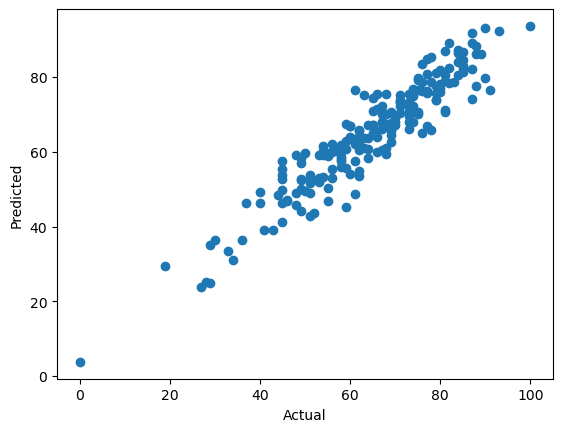

In [66]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

<AxesSubplot:xlabel='math_score'>

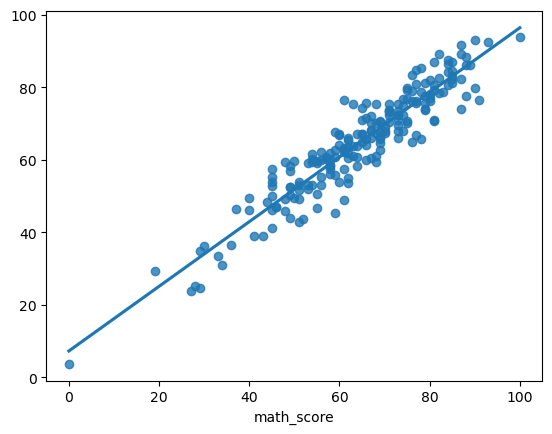

In [67]:
sns.regplot(x=y_test, y=y_pred, ci=None)